# EDA (Exploratory Data Analysis) [Vineet]
is a phenomenon under data analysis used for gaining a better understanding of data aspects like:
* main features of data
* variables and relationships that hold between them
* identifying which variables are important for our problem

The dataset we are using here is the Telco Churn Dataset.
As per Wikipedia definition, customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers. Customer churn rate is a key business metric in any industry and company providing services to end customers, because the cost of retaining an existing customer is far less than acquiring a new one.

Steps:
    - 1.Read Data
    - 2.Prepare Data for analysis
    - 3.Using Descriptive Statistics understand characteristics of the data and to get a quick summary of it
    - 4.Using Visual and Basic techniques 
        * Analyze the relationship with target (Churn) with each 'feature'.
        * Try to combine the relation with target and many features.

In [87]:
import numpy as np # allows us to work with multi-dimensional arrays and matrices
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#keeps the outputted graph inline


## 1. Reading Data and 2. Data Preparation

In [88]:
#read csv file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [89]:
print (df.shape)
print ("There are ",df.shape[0]," rows")

(7043, 21)
There are  7043  rows


In [90]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [91]:
# What are the features available and what are their data type?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Objects are of the type String, which we might need to convert to categorical values

In [92]:
# Is there any empty data in training dataset?
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing data.
If there was missing data we would need to delete that row or replace it from previous rows.
This reduces alot of work

## 3.Descriptive Statistics

In [93]:
df.describe() #method only applies to numerical features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 4.Eda

In [94]:
#method to create bar graphs
def churnedbargraph(feature,df):
    fig, axes = plt.subplots(figsize=(7,4))
    data = df[feature].value_counts(normalize=True)
    axes.bar(data.index, data*100, color=['green', 'red','blue'])
    axes.set_title('Distribution of Churn %')
    axes.set_ylabel('Percentage')
    axes.set_xlabel(feature)
    for index,data in enumerate(data):
        plt.text(x=index , y =data+2 , s=f"{round(data,2)*100}" , fontdict=dict(fontsize=10))
    plt.show()


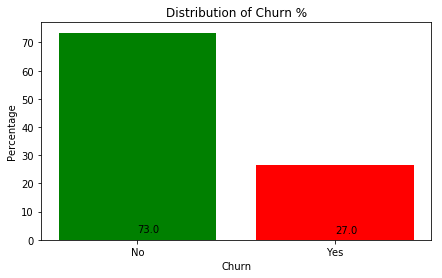

In [95]:
churnedbargraph('Churn',df)

Around 27 percent of the customers have churned. Even though this seems like only a forth of the whole, below data highlights how much revenue has been lost

In [101]:
revenueloss=df.loc[df['Churn'] == "Yes", 'MonthlyCharges'].sum()
totalrev=df.loc[:,'MonthlyCharges'].sum()
perloss=(revenueloss/totalrev)*100
print ("The revenue loss this month would be ",revenueloss," dollars, around ",perloss," percentage of total revenue last month");
print("this is now a more significant percentage than 27 percent")

The revenue loss this month would be  139130.85  dollars, around  30.503351555282137  percentage of total revenue last month
this is now a more significant percentage than 27 percent


In [97]:
#Converting "SeniorCitizen" numerical data to Yes and No for better display in bar graph
sc={1:'yes',0:'no'}
df.SeniorCitizen= [sc[item] for item in df.SeniorCitizen]
#Creating a Dataframe which has only rows where the customers have churned 
churneddf=df.loc[df['Churn'] == "Yes",:]
churneddf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,no,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


#### In the next process, I have created bar graphs for each feature of the given data for where the customers have churned.
#### Using these bar graphs, which groups churn more are found
#### This is a fairly straight forward approach. However, very powerful conclusions could be fabricated.

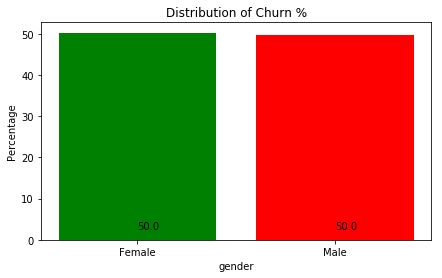

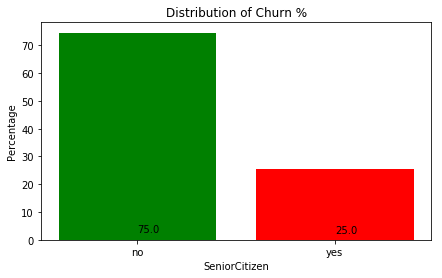

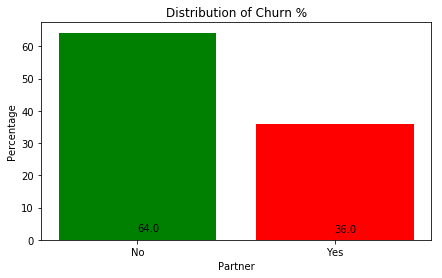

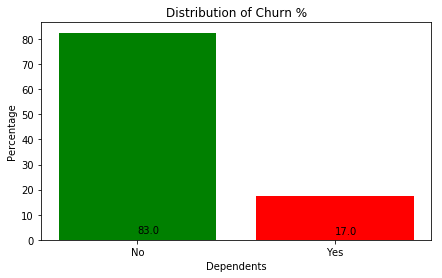

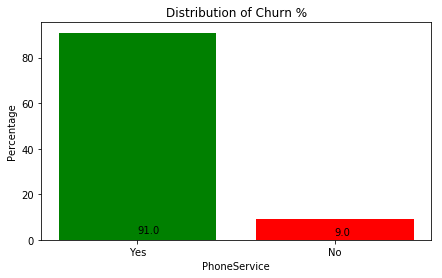

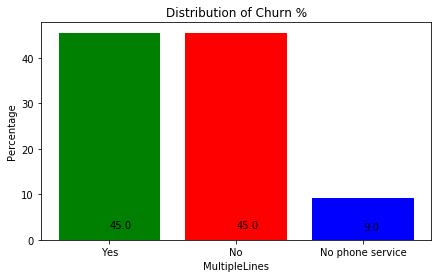

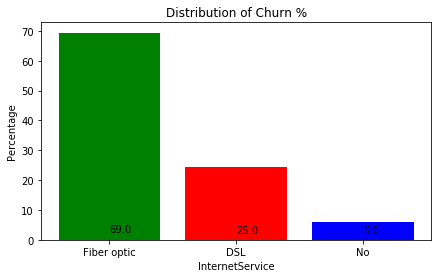

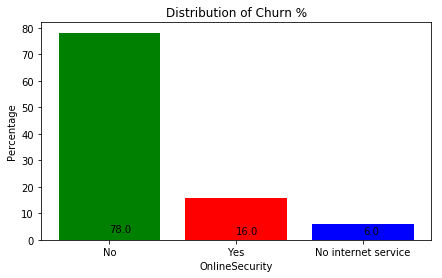

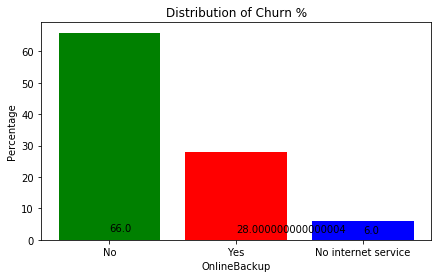

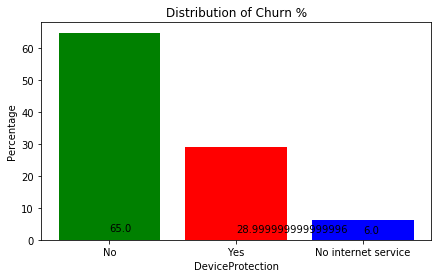

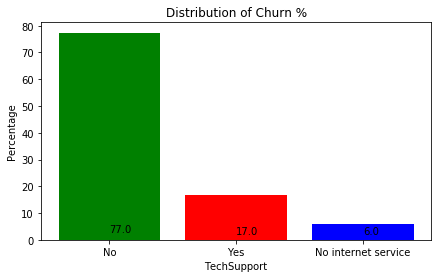

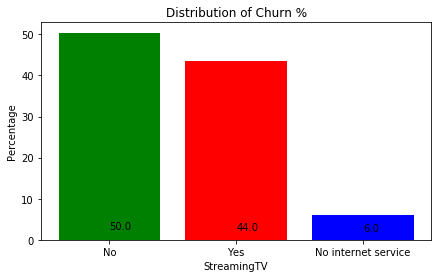

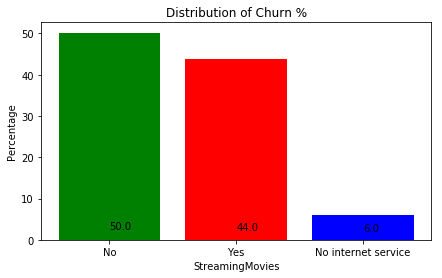

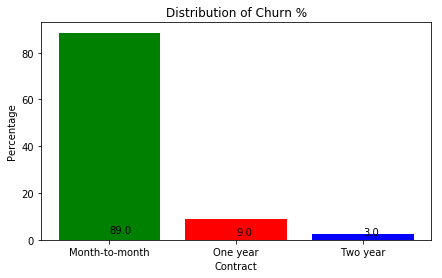

In [100]:
reqcollist=[1,2,3,4,6,7,8,9,10,11,12,13,14,15]
for x in reqcollist:
    churnedbargraph(df.columns[x],churneddf)

### Observations
* Gender doesnt play a big role in the churn rate. Almost both male and females have churned
* Younger Generation churns more than Seniors
* Customers without partners churn more by double
* Customers without dependants churn more by 4 times
* Providing Online Security might reduce churn percentage, since customers who dont have online security churned.
* A very important observation : Customers subscribed to month-to-month subscription churn the most(89%) compared to one year contract and two year contract ones

Next, let us see how tenure, and monthly charges are distributed and affective in churn

Tenure is the amount of time a customer was associated with the company.
Let us analyze few important points

Text(0, 0.5, 'MonthlyCharges')

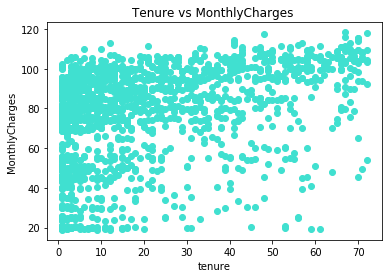

In [106]:
# create a figure and axis
fig, ax = plt.subplots()

ax.scatter(churneddf['tenure'],churneddf['MonthlyCharges'],color='turquoise')
# set a title and labels
ax.set_title('Tenure vs MonthlyCharges ')
ax.set_xlabel('tenure')
ax.set_ylabel('MonthlyCharges')

From the above scatter graph customers having low tenure and high monthly charges churn more. Lower monthly charges while starting out would be a better idea to keep customers.When people have been associated for long, they tend to stick around.

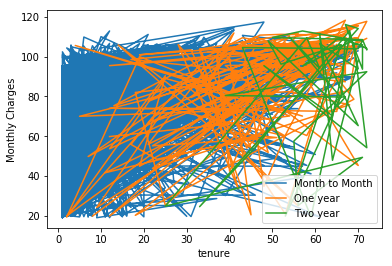

In [109]:
churneddf1=churneddf.loc[churneddf['Contract'] == "Month-to-month",:]
churneddf2=churneddf.loc[churneddf['Contract'] == "One year",:]
churneddf3=churneddf.loc[churneddf['Contract'] == "Two year",:]
line_chart1 = plt.plot(churneddf1['tenure'],churneddf1['MonthlyCharges'])
line_chart2 = plt.plot(churneddf2['tenure'],churneddf2['MonthlyCharges'])
line_chart3 = plt.plot(churneddf3['tenure'],churneddf3['MonthlyCharges'])
plt.title('')
plt.xlabel('tenure')
plt.ylabel('Monthly Charges')
plt.legend(['Month to Month', 'One year','Two year'], loc=4)
plt.show()

Customers who took a month-to-month plan generally have a low tenure comparitvely to one year and two year plans. 

#### Boxplot of Monthly Charges of customers who churned

Boxplot of Monthly Charges of customers who churned


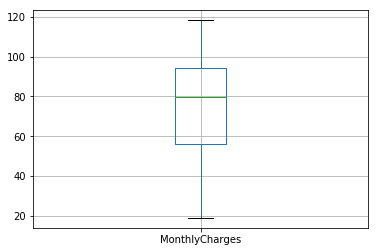

In [113]:

churneddf.boxplot('MonthlyCharges')


#### Boxplot of Monthly Charges of customers who have not churned

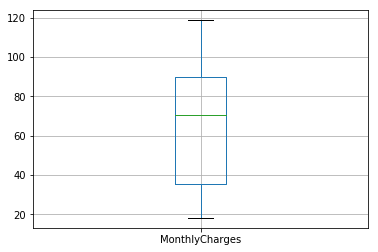

In [115]:

df.boxplot('MonthlyCharges')

* For the customers who have churned,the average Monthly charge is around 80 and highest is around 120. Most of the customers have monthly charges less than 80.
* For the customers who haven't churned,the average Monthly charge is around 70 and highest is around 120. Most of the customers have monthly charges less than 60. 
* However,the volume of  customers who are still associated with the company,having lesser charges is greater than the volume who aren't associated anymore who had higher charges. 
* A perfect balance must be kept in monthly charges, as 90 percent of churned customers are having monthly contracts.


## This is the end of EDA